#### Andrea Provino - Data Science Portfolio
##### 08/08/2019

# Big Mart Sales

The aim of the projects is to get deeper inside the major task of a Data Scientist. These are the main sections of the document:
1. Preliminary report
2. Exploration Data Analysis (EDA)
3. Data Cleaning (DC)
4. Features Engineering (FE)
5. Algorithm Selection (AS)
6. Model Training (MT)
7. Insights & Analysis

#### <span style="color:#555">PROJECT REFERENCES</span>
* full project info can be find [here](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

## I. Preliminary Report

The data scientists at BigMart (the NO 1 Grocery Franchise in India) have collected in 2013, sales data from 1559 products across 10 stores in different cities. The aim of the project is to **build a predictive model and find out the sales of each product at a particular store**.
<br>
<br>
The aim of the clients is also to **understand the properties of products and stores which play a key role in increasing sales**.
#### <span style="color:#555">DELIVERABLE</span>
The projects output will be a trained model file and a report that the client will use to gain more insights about its business
#### <span style="color:#555">MACHINE LEARNING TASK</span>
The project is a supervised learning task, since the training data is labeled. In particular is a machine learning regression task.
#### <span style="color:#555">TARGET VARIABLE</span>
The target variable of the project is the Item Outlet Sales, renamed as Item Sales for practical reasons.
#### <span style="color:#555">INPUT FEATURES</span>
| Column Name | Description |
| --- | --- |
|Item_Identifier | Unique product ID |
| Item_Weight | Weight of product|
| Item_Fat_Content | Whether the product is low fat or not |
| Item_Visibility | The % of total display area of all products in a store allocated to the particular product |
| Item_MRP | Maximum Retail Price (list price) of the product |
| Outlet_Identifier | Unique store ID |
| Outlet_Establishment_Year | The year in which store was established | 
| Outlet_Size | The size of the store in terms of ground area covered |
| Outlet_Location_Type | The type of city in which the store is located |
| Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket |
| Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.|

#### <span style="color:#555">WIN CONDITION</span>
**Root Mean Squared Error (RMSE)** < 1100

#### <span style="color:#555">LIBRARIES USED</span>

In [1]:
#numpy for numerical computation
import numpy as np

#pandas for managing data, setting max columns to 30
import pandas as pd
pd.set_option('display.max_columns',30)

#matplotlib for showing plots
from matplotlib import pyplot as plt
%matplotlib inline

#import warnings and suppres FutureWarning
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

#seaborn for complex plots
import seaborn as sns
sns.set_style('darkgrid')

## II. Exploratory Data Analsys

#### <span style="color:blue">BASIC EDA</span>
The client sended data into .txt format. It will not be a problem.

In [2]:
df = pd.read_csv('Datasets/train.txt')
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [3]:
df.shape

(8523, 12)

In [4]:
#rename some features to easily write them
df = df.rename(columns={
    "Item_Identifier": "Item_ID",
    "Outlet_Identifier": "Outlet_ID",
    "Outlet_Establishment_Year": "Outlet_Year",
    "Outlet_Location_Type": "Outlet_Location",
    "Item_Outlet_Sales": "Item_Sales"
})

In [5]:
df.tail()

Item_ID  Item_Weight Item_Fat_Content  Item_Visibility  \
8518   FDF22        6.865          Low Fat         0.056783   
8519   FDS36        8.380          Regular         0.046982   
8520   NCJ29       10.600          Low Fat         0.035186   
8521   FDN46        7.210          Regular         0.145221   
8522   DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_ID  Outlet_Year Outlet_Size  \
8518         Snack Foods  214.5218    OUT013         1987        High   
8519        Baking Goods  108.1570    OUT045         2002         NaN   
8520  Health and Hygiene   85.1224    OUT035         2004       Small   
8521         Snack Foods  103.1332    OUT018         2009      Medium   
8522         Soft Drinks   75.4670    OUT046         1997       Small   

     Outlet_Location        Outlet_Type  Item_Sales  
8518          Tier 3  Supermarket Type1   2778.3834  
8519          Tier 2  Supermarket Type1    549.2850  
8520          Tier 2  Supermarket Type1   1193.1136  
8521          Tier 3  Supermarket Type2   1845.5976  
8522          Tier 1  Supermarket Type1    765.6700

In [6]:
df.dtypes

Item_ID              object
Item_Weight         float64
Item_Fat_Content     object
Item_Visibility     float64
Item_Type            object
Item_MRP            float64
Outlet_ID            object
Outlet_Year           int64
Outlet_Size          object
Outlet_Location      object
Outlet_Type          object
Item_Sales          float64
dtype: object

Showing summary statistics for numeric features

In [7]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Year    Item_Sales
count  7060.000000      8523.000000  8523.000000  8523.000000   8523.000000
mean     12.857645         0.066132   140.992782  1997.831867   2181.288914
std       4.643456         0.051598    62.275067     8.371760   1706.499616
min       4.555000         0.000000    31.290000  1985.000000     33.290000
25%       8.773750         0.026989    93.826500  1987.000000    834.247400
50%      12.600000         0.053931   143.012800  1999.000000   1794.331000
75%      16.850000         0.094585   185.643700  2004.000000   3101.296400
max      21.350000         0.328391   266.888400  2009.000000  13086.964800

Item Sales has got an high std

In [8]:
#show summary statistic for categorical features
df.select_dtypes(include="object").describe()

Item_ID Item_Fat_Content              Item_Type Outlet_ID Outlet_Size  \
count     8523             8523                   8523      8523        6113   
unique    1559                5                     16        10           3   
top      FDW13          Low Fat  Fruits and Vegetables    OUT027      Medium   
freq        10             5089                   1232       935        2793   

       Outlet_Location        Outlet_Type  
count             8523               8523  
unique               3                  4  
top             Tier 3  Supermarket Type1  
freq              3350               5577

#### <span style="color:BLUE">UNDERSTAING TARGET FEATURE</span>
##### Correlation between item_sales and outlet_type
Plot relation between **Item_Sales** and **Item_Visibility** by creating a plot for each **Outlet_Type**

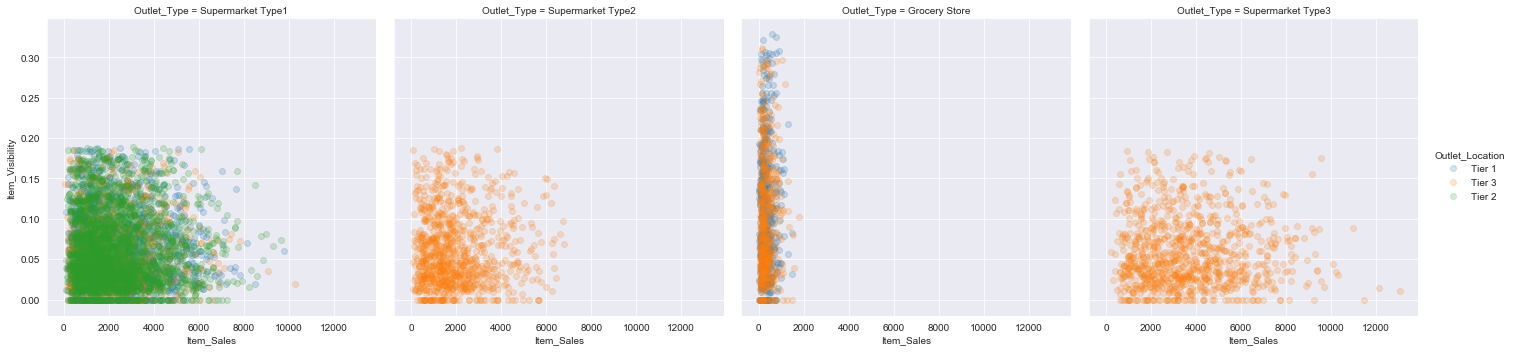

In [9]:
sns.lmplot(x='Item_Sales',
          y='Item_Visibility',
           col="Outlet_Type",
           hue='Outlet_Location',
          data=df,
          fit_reg=False,
          scatter_kws={'alpha':'.2'})
plt.show()

In [10]:
df.groupby('Outlet_Type').Item_Sales.agg('mean').reset_index()

Outlet_Type   Item_Sales
0      Grocery Store   339.828500
1  Supermarket Type1  2316.181148
2  Supermarket Type2  1995.498739
3  Supermarket Type3  3694.038558

In [11]:
df.groupby('Outlet_Location').Item_Sales.agg('mean').reset_index()

Outlet_Location   Item_Sales
0          Tier 1  1876.909159
1          Tier 2  2323.990559
2          Tier 3  2279.627651

#### <span style='color:green'>CONSIDERATION<span>
<br>
    At first it seemed supermarkets could be grouped in the same class, but after checking the average sales for each supermarket type, this hypothesis quickly became impracticable.
    <br>
    <br>
    Plots show the presence of a boundary for visibility of 0.2 as well as for sales < 2000 considering Grocery Stores
<br>
    <br>

##### Distribution of item_sales


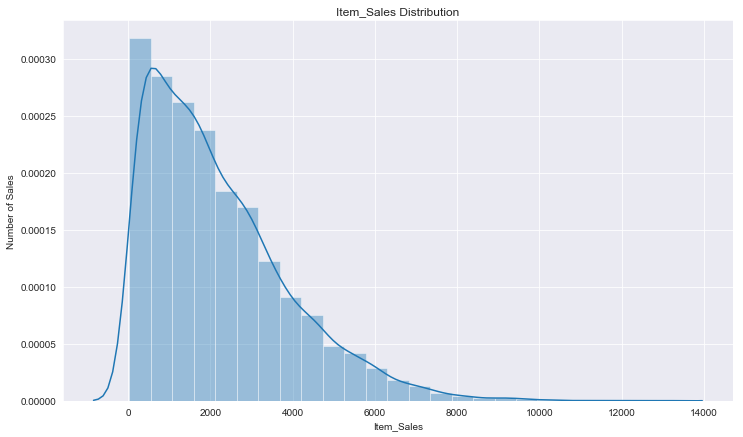

In [12]:
plt.figure(figsize=(12,7))
sns.distplot(df.Item_Sales,bins=25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Sales Distribution")
plt.show()

#### <span style='color:green'>CONSIDERATION<span>
<br>
The distribution of Item_Sales shows the datatset is skewed to the right since the number of high sales is clearly much lower than the number of lower ones.
<br>
<br>
Since the dataset seem to be imbalanced, the model may outperform poorly in predicting high sale products due to the lack of observations.    

##### Distribution of item_mrp
Item MRP as maximum retail price of the product could be deeply connected to item sales.

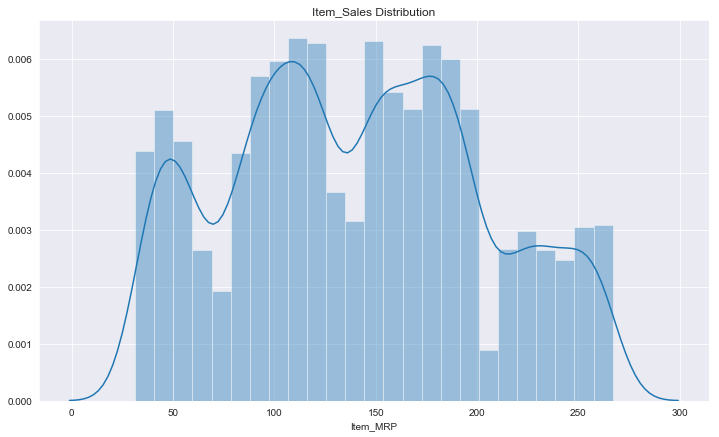

In [13]:
plt.figure(figsize=(12,7))
sns.distplot(df.Item_MRP,bins=25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_MRP")
plt.title("Item_Sales Distribution")
plt.show()

In [14]:
#define conditions
conditions = [
    (df['Item_MRP'] < 80),
    (df['Item_MRP'] >= 80) & (df['Item_MRP'] < 150),
    (df['Item_MRP'] >= 150) & (df['Item_MRP'] < 200),
    (df['Item_MRP'] > 200)
]
#define labels, use number to use feature in corr map
choices = ['0','1','2','3']
df['Item_Price_Range'] = np.select(conditions, choices, default='low').astype(int)

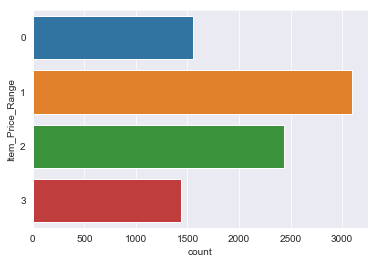

In [15]:
sns.countplot(y='Item_Price_Range',
             data=df)

#### <span style='color:green'>CONSIDERATION</span>
The Item_MRP plots show a multimodal distributions, with 4 modes.
<br>
This insight it has been used to create a new feature called **Item_Price_Range** whose class are numeric to use the feature in the correlation matrix


#### <span style="color:BLUE">UNDERSTAING DATASET FEATURES</span>
##### Categorical features unique values

In [16]:
#show unique cetegorical features values
categorical_columns = df.select_dtypes(include='object')

#drop id features as less util
#note that inplace=True return SettingCopyWarning, is not a problem since we are just exploring
categorical_columns.drop(['Item_ID','Outlet_ID'], axis=1, inplace=True)

#plot classes for each categorical features
for feature in categorical_columns:
    print("\n Frequency of categories for: ",feature)
    print(df[feature].value_counts())


 Frequency of categories for:  Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

 Frequency of categories for:  Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

 Frequency of categories for:  Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

 Frequency of categories for:  Outlet_Location
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location, dtype: int64

 Frequency of categories for:  

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### <span style="color:#555">UNDERSTANDING FEATURE: *ITEM FAT CONTENT*</span>

Sum of values:  8523
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


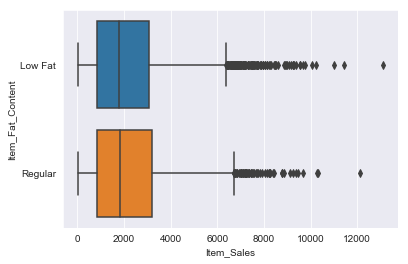

In [17]:
#correct typos on item_fat_content
df.Item_Fat_Content.replace(['LF','low fat'], 'Low Fat', inplace=True)
df.Item_Fat_Content.replace(['reg'], 'Regular', inplace=True)

#show total number of unique values
print("Sum of values: ",df.Item_Fat_Content.value_counts().sum())
print(df.Item_Fat_Content.value_counts())

#show boxplot
sns.boxplot(y='Item_Fat_Content', x='Item_Sales', data=df)

#remove any text
plt.show()

#### <span style='color:green'>CONSIDERATION</span>
<br>
Item_Fat_Content contained typos and redundant classes, so they have been replaced and corrected. Toghether they classify all items present in the dataset though there are some items (Household) that are not consumable. In order to have a better item classification method that could replace also Item_Type (too many classes), let's inspect Item_ID

#### <span style="color:#555">UNDERSTANDING FEATURE: *ITEM TYPE*</span>

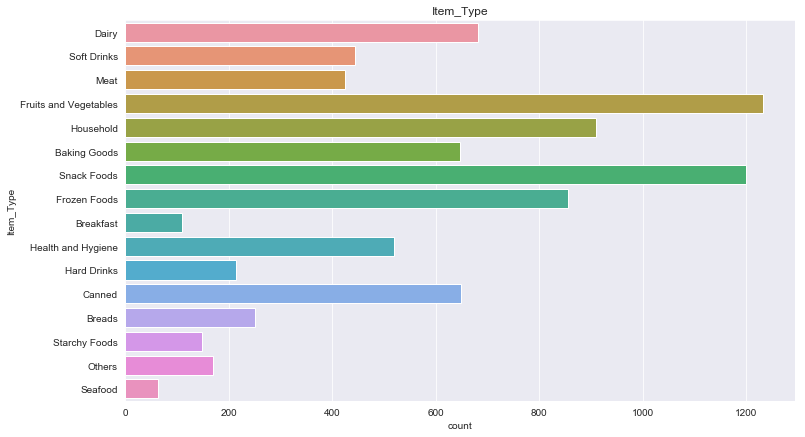

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(y = 'Item_Type', data=df)
plt.title('Item_Type')
plt.show()

#### <span style="color:#555">UNDERSTANDING FEATURE: *OUTLET SIZE*</span>

Sum of values:  6113
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


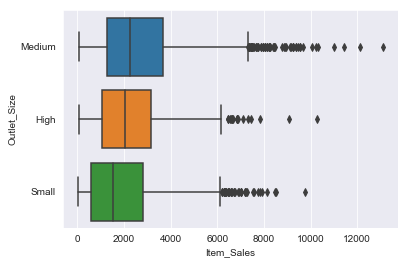

In [19]:
#show total number of unique values
print("Sum of values: ",df.Outlet_Size.value_counts().sum())
print(df.Outlet_Size.value_counts())

#show boxplot
sns.boxplot(y='Outlet_Size', x='Item_Sales', data=df)

#remove any text
plt.show()

#### <span style="color:red">OUTLIERS</span>


In [20]:
#create a filter base on plots data
outliers = ((df.Outlet_Location == 'Tier 3') & (df.Item_Sales > 9000)  & (df.Outlet_Type == 'Supermarket Type3'))
print(df[outliers].shape)
df[outliers].head()

(18, 13)


Item_ID  Item_Weight Item_Fat_Content  Item_Visibility  \
333    FDN58          NaN          Regular         0.056597   
456    FDS26          NaN          Low Fat         0.089036   
991    FDS44          NaN          Regular         0.155288   
1009   FDU14          NaN          Low Fat         0.034584   
1450   FDZ20          NaN          Low Fat         0.000000   

                  Item_Type  Item_MRP Outlet_ID  Outlet_Year Outlet_Size  \
333             Snack Foods  230.9984    OUT027         1985      Medium   
456                   Dairy  260.5594    OUT027         1985      Medium   
991   Fruits and Vegetables  241.7538    OUT027         1985      Medium   
1009                  Dairy  248.3750    OUT027         1985      Medium   
1450  Fruits and Vegetables  253.0356    OUT027         1985      Medium   

     Outlet_Location        Outlet_Type  Item_Sales  Item_Price_Range  
333           Tier 3  Supermarket Type3   9267.9360                 3  
456           Tier 3  Supermarket Type3   9158.0790                 3  
991           Tier 3  Supermarket Type3   9133.4444                 3  
1009          Tier 3  Supermarket Type3  10236.6750                 3  
1450          Tier 3  Supermarket Type3  11445.1020                 3

#### <span style="color:green">CONSIDERATION</span>
EDA shows there are some outliers whose origin is not very clear. Since simply remove them without a valid reason is a bad practice, a filter has been created in order to check the impact they have on the model.
<br>
<br>
It seems all the spotted outliers belogn to the OUT027 Outlet and have NaN Weight

In [21]:
df.groupby('Outlet_ID').Item_Sales.agg(['sum','mean','max','min'])

sum         mean         max       min
Outlet_ID                                                 
OUT010     1.883402e+05   339.351662   1775.6886   33.2900
OUT013     2.142664e+06  2298.995256  10256.6490   73.2380
OUT017     2.167465e+06  2340.675263   9664.7528  143.8128
OUT018     1.851823e+06  1995.498739   6768.5228   69.2432
OUT019     1.796941e+05   340.329723   1482.0708   33.9558
OUT027     3.453926e+06  3694.038558  13086.9648  241.6854
OUT035     2.268123e+06  2438.841866   8479.6288  113.8518
OUT045     2.036725e+06  2192.384798   8994.9580   99.8700
OUT046     2.118395e+06  2277.844267   9779.9362  101.8674
OUT049     2.183970e+06  2348.354635   7646.0472  111.8544

#### <span style="color:#555">UNDERSTANDING FEATURE: *ITEM ID*</span>
##### <span style="color:red">Domain knonwledge</span>
Items in a store are usually classified using some standard. It is interesting to see if in this dataset is present some useful classification standard. 

In [22]:
df.sample(n=10)

Item_ID  Item_Weight Item_Fat_Content  Item_Visibility  \
1638   FDV34       10.695          Regular         0.011443   
143    NCC30       16.600          Low Fat         0.027622   
6329   FDA50       16.250          Low Fat         0.087175   
1183   FDW09       13.650          Regular         0.025899   
8044   FDF22        6.865          Low Fat         0.057062   
7552   FDA47       10.500          Regular         0.117334   
5345   FDY31        5.980          Low Fat         0.043651   
6628   FDS57          NaN          Low Fat         0.102941   
5056   FDI05        8.350          Regular         0.127587   
8472   NCS41          NaN          Low Fat         0.053185   

                  Item_Type  Item_MRP Outlet_ID  Outlet_Year Outlet_Size  \
1638            Snack Foods   73.5038    OUT049         1999      Medium   
143               Household  177.6344    OUT049         1999      Medium   
6329                  Dairy   98.3410    OUT046         1997       Small   
1183            Snack Foods   81.1302    OUT013         1987        High   
8044            Snack Foods  212.0218    OUT018         2009      Medium   
7552           Baking Goods  164.1210    OUT017         2007         NaN   
5345  Fruits and Vegetables  146.1418    OUT045         2002         NaN   
6628            Snack Foods  142.0470    OUT027         1985      Medium   
5056           Frozen Foods   76.5354    OUT017         2007         NaN   
8472     Health and Hygiene  182.9608    OUT027         1985      Medium   

     Outlet_Location        Outlet_Type  Item_Sales  Item_Price_Range  
1638          Tier 1  Supermarket Type1   1478.0760                 0  
143           Tier 1  Supermarket Type1   2676.5160                 2  
6329          Tier 1  Supermarket Type1   1351.5740                 1  
1183          Tier 3  Supermarket Type1    792.3020                 1  
8044          Tier 3  Supermarket Type2   2350.9398                 3  
7552          Tier 2  Supermarket Type1   2773.0570                 2  
5345          Tier 2  Supermarket Type1   3089.9778                 1  
6628          Tier 3  Supermarket Type3   2719.7930                 1  
5056          Tier 2  Supermarket Type1   1805.6496                 0  
8472          Tier 3  Supermarket Type3   1653.8472                 2

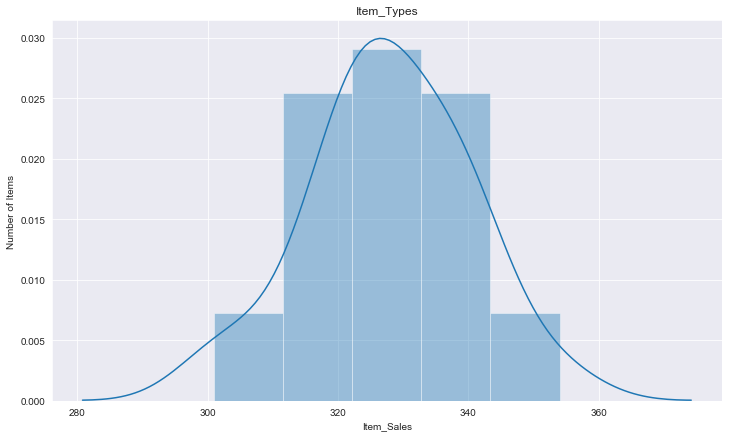

Unique classes (same as alphabeth): 26


In [23]:
#select first three letter
df['Item_ID_3'] = df.Item_ID.apply(lambda x: x[2:3])

plt.figure(figsize=(12,7))
sns.distplot(df.Item_ID_3.value_counts(),bins=5)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Sales")
plt.ylabel("Number of Items")
plt.title("Item_Types")
plt.show()

#item_ID_3 len
print("Unique classes (same as alphabeth):",len(df.Item_ID_3.value_counts()))

FD    6125
NC    1599
DR     799
Name: Item_ID_2, dtype: int64


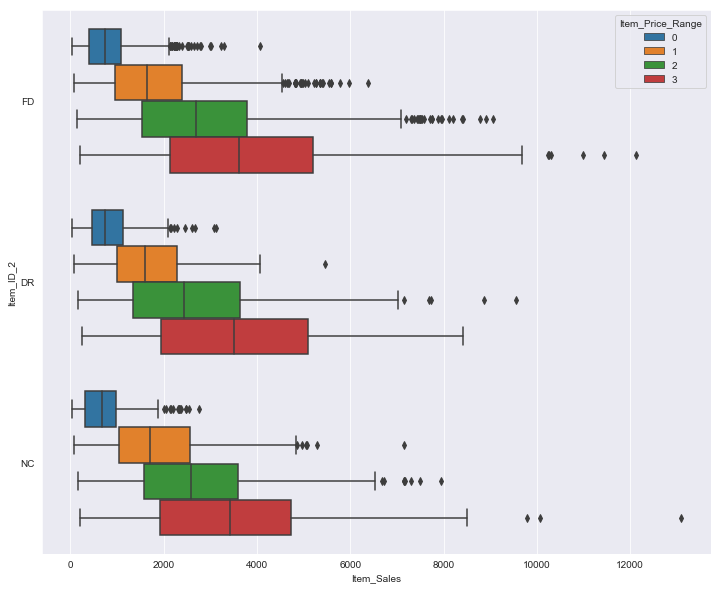

In [24]:
#select first two letter
df['Item_ID_2'] = df.Item_ID.apply(lambda x: x[0:2])
print(df.Item_ID_2.value_counts())
plt.figure(figsize=(12,10))
sns.boxplot(x='Item_Sales',
           y='Item_ID_2',
            hue='Item_Price_Range',
           data=df)
plt.show()
#df[df.Item_Sales < 6000]

In [25]:
df.head()

Item_ID  Item_Weight Item_Fat_Content  Item_Visibility  \
0   FDA15         9.30          Low Fat         0.016047   
1   DRC01         5.92          Regular         0.019278   
2   FDN15        17.50          Low Fat         0.016760   
3   FDX07        19.20          Regular         0.000000   
4   NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_ID  Outlet_Year Outlet_Size  \
0                  Dairy  249.8092    OUT049         1999      Medium   
1            Soft Drinks   48.2692    OUT018         2009      Medium   
2                   Meat  141.6180    OUT049         1999      Medium   
3  Fruits and Vegetables  182.0950    OUT010         1998         NaN   
4              Household   53.8614    OUT013         1987        High   

  Outlet_Location        Outlet_Type  Item_Sales  Item_Price_Range Item_ID_3  \
0          Tier 1  Supermarket Type1   3735.1380                 3         A   
1          Tier 3  Supermarket Type2    443.4228                 0         C   
2          Tier 1  Supermarket Type1   2097.2700                 1         N   
3          Tier 3      Grocery Store    732.3800                 2         X   
4          Tier 3  Supermarket Type1    994.7052                 0         D   

  Item_ID_2  
0        FD  
1        DR  
2        FD  
3        FD  
4        NC

In [26]:
#make Item_ID_2 available in corr map (transform it into a numeric feature)
df['Item_ID_2'].value_counts()
conditions = [
    df['Item_ID_2'] == 'FD',
    df['Item_ID_2'] == 'NC',
    df['Item_ID_2'] == 'DR'
]
choices = ['0','1','2']
df['Item_ID_2_numeric'] = np.select(conditions, choices, default='Missing').astype(int)

#### <span style='color:green'>CONSIDERATION</span>
<br>
<br>
In order to find a better solution through which divide items, the hypothesis of considering Item_ID feature was taken into consideration. 
<br>
<br>
The first solution took the third letter and find out items are classified using 26 letters (all alphabet letters) and this new feature has a normal distribution. But the number of classes is too high to concretely use them in a useful way.
<br>
<br>
The second solution took the first two letters of ID and find out items are classifier using three classes (FD, NC, DR). In order to yuse this classification item_fat_content need to be changed taking at mind that NC (non consumamble products) can not use this classification

#### <span style="color:#555">UNDERSTANDING FEATURE: *ITEM WEIGHT*</span>

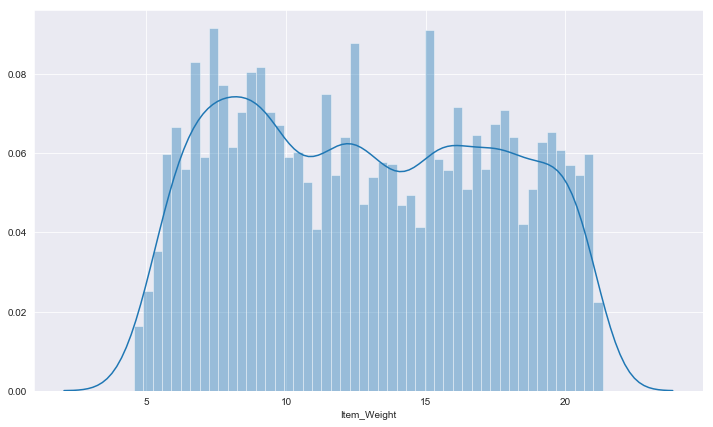

In [27]:
plt.figure(figsize=(12,7))
#since item_weight contains nan use notna to select other values
sns.distplot(df[pd.notna(df.Item_Weight)].Item_Weight, bins=50)
plt.show()

#### <span style='color:green'>CONSIDERATION</span>
<br>
<br>
Item_Weight distribution seem to be multimodal with 3 modes.

#### <span style="color:#555">UNDERSTANDING FEATURE: *ITEM VISIBILITY*</span>

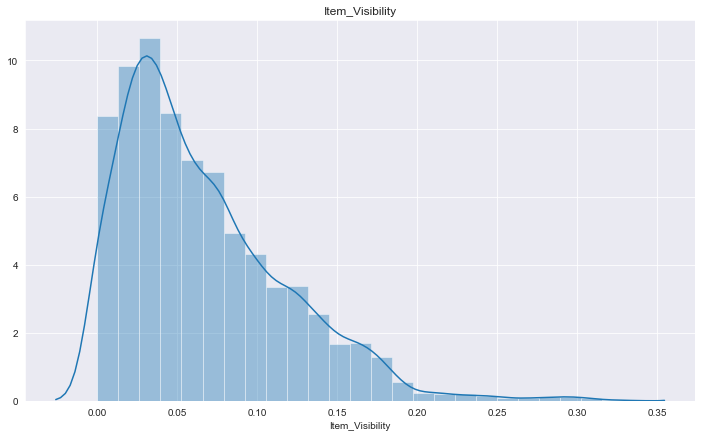

In [28]:
plt.figure(figsize=(12,7))
sns.distplot(df.Item_Visibility,bins=25)
plt.title("Item_Visibility")
plt.show()

#### <span style="color:green">CONSIDERATION</span>
<br>
<br>
Item_Visibility feature is skewed to the right, as noticed for Item_Sales that is the key feature. Maybe the correlation map will finally help to find if they are correlated or not.
<br>
For now, it seems they are.

#### <span style="color:#555">UNDERSTANDING FEATURE: *OUTLET ESTABLISHMENT YEAR*</span>

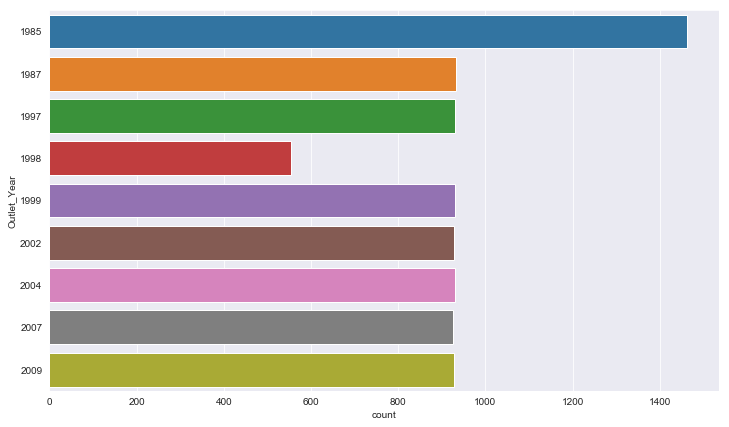

In [29]:
plt.figure(figsize=(12,7))
sns.countplot(y='Outlet_Year',data=df)
plt.show()

#### <span style="color:green">CONSIDERATION</span>
It seems that for 10 years, from 1987 to 1997, none Outlets has been built. This is probably due to the [Indian Crysis](https://en.wikipedia.org/wiki/1991_Indian_economic_crisis) that persist untill 1991. 
<br>
From that moment on, Outlets opened every two / three years, though in 1998 opening rate drastically reduced. 

#### <span style="color:BLUE">MISSING VALUES</span>

In [30]:
df.isnull().sum()

Item_ID                 0
Item_Weight          1463
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size          2410
Outlet_Location         0
Outlet_Type             0
Item_Sales              0
Item_Price_Range        0
Item_ID_3               0
Item_ID_2               0
Item_ID_2_numeric       0
dtype: int64

<span style="color:red">Attention: ABT Contruction - Data Cleaning</span>
<br>
<br>
Two features contains missing values. The former is a numeric feature so it must be treated using flag and fill technique, while the latter is a categorial feature so NaN values can be simply flagged as 'Missing'

#### <span style="color:blue">UNDERSTAING CORRELATION MAP</span>

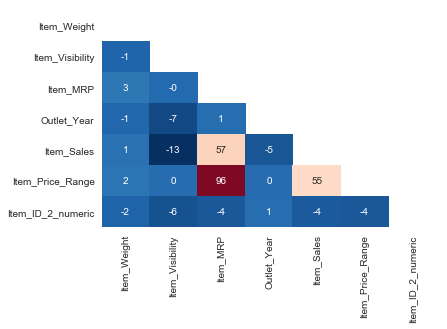

In [31]:
#create correlation map
corr = df.corr()

#create mask
corr_mask = np.zeros_like(corr)
#upper triangle as 1
corr_mask[np.triu_indices_from(corr_mask)] = 1

#set white background
sns.set_style('white')

#plot corr map
sns.heatmap(corr*100, fmt='.0f', annot=True, cbar=False, cmap='RdBu_r', mask=corr_mask)

#remove text 
plt.show()

#### <SPAN STYLE="COLOR:#555">CREATE ORDERED CATEGORY</SPAN>
More info can be find [here](https://pbpython.com/pandas_dtypes_cat.html)

In [32]:
#this is just a test and does not impact directly on EDA over this project
from pandas.api.types import CategoricalDtype

#define a custom categorical type to easilly sort values
outlet_size_cat_type = CategoricalDtype(['Missing','Small','Medium','High'], ordered=True)

#set new type
df.Outlet_Size = df.Outlet_Size.astype(outlet_size_cat_type)

## III. Data Cleaning

In order to keep EDA and Data Cleaning apart, from now on 'abt' will be used instead of working with 'df'

In [33]:
#clean version of our dataset
abt = pd.read_csv('Datasets/train.txt')
abt.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [34]:
#drop duplicates if any
print("Before: ",abt.shape[0])
abt.drop_duplicates(inplace=True)
print("After:",abt.shape[0])

Before:  8523
After: 8523


#### <SPAN STYLE="COLOR:green">MISSING VALUES</SPAN>
In order to keep as much information as possible and avoid changing the dataset, this tasks will be performed:
* fill Outlet_Size NaN with 'Missing' value
* flag Item_Weight NaN by creating a new indicator feature and fill them with 0
* create and indicator feature for Item_Visibility

In [35]:
abt.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [36]:
#fill Outlet_size NaN
abt.Outlet_Size.fillna('Missing',inplace=True)

In [37]:
#create new feature for Item Weight
abt['Item_Weight_Missing'] = abt.Item_Weight.isnull().astype(int)

#fill NaN value with 0 in order to let algorithms work properly
abt.Item_Weight.fillna(0,inplace=True)

In [38]:
#create new feature for Item Visibility 0
abt['Item_Visibility_Missing'] = (abt.Item_Visibility == 0).astype(int)

#sanity check
abt.Item_Visibility_Missing.sum()

526

In [39]:
#missing values sanity check
abt.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_Missing          0
Item_Visibility_Missing      0
dtype: int64

#### <SPAN STYLE="COLOR:green">TYPOS AND SPARE CLASSES</SPAN>

In [40]:
#check typos
abt.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [41]:
#Item_Fat_Content typos
abt.Item_Fat_Content.replace(['LF', 'low fat'], 'Low Fat', inplace=True)
abt.Item_Fat_Content.replace('reg','Regular', inplace=True)

#sanity check
abt.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [42]:
#use Item_ID based classification instead of using Item_Type classification (drop feature)
abt.Item_Type = abt.Item_Identifier.apply(lambda x: x[0:2])

#sanity check
abt.Item_Type.value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type, dtype: int64

In [43]:
#now since NC items does not have fat content, create class none
abt.Item_Fat_Content[abt.Item_Type == 'NC'] = 'None'

#sanity check
abt.Item_Fat_Content.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Low Fat    3918
Regular    3006
None       1599
Name: Item_Fat_Content, dtype: int64

## IV. Feature engineering

In [44]:
#create Outlet_Age (data collected in 2013)
abt['Outlet_Age'] = abt.Outlet_Establishment_Year.apply(lambda x: 2013 - x)
#sanity check
abt.Outlet_Age.value_counts()

28    1463
26     932
14     930
9      930
16     930
11     929
4      928
6      926
15     555
Name: Outlet_Age, dtype: int64

#### <span style="color:green">DROPPING FEATURES</span>

Drop establishment year since we have engineered Outlet_Age, and Item_Identifier since it is not helpful

In [45]:
abt.drop(['Outlet_Establishment_Year','Item_Identifier'], axis = 1, inplace=True)

#### <span style="color:green">DUMMY FEATURES</span>

In [46]:
abt = pd.get_dummies(abt)
#sanity check
abt.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0         9.30         0.016047  249.8092          3735.1380   
1         5.92         0.019278   48.2692           443.4228   
2        17.50         0.016760  141.6180          2097.2700   
3        19.20         0.000000  182.0950           732.3800   
4         8.93         0.000000   53.8614           994.7052   

   Item_Weight_Missing  Item_Visibility_Missing  Outlet_Age  \
0                    0                        0          14   
1                    0                        0           4   
2                    0                        0          14   
3                    0                        1          15   
4                    0                        1          26   

   Item_Fat_Content_Low Fat  Item_Fat_Content_None  Item_Fat_Content_Regular  \
0                         1                      0                         0   
1                         0                      0                         1   
2                         1                      0                         0   
3                         0                      0                         1   
4                         0                      1                         0   

   Item_Type_DR  Item_Type_FD  Item_Type_NC  Outlet_Identifier_OUT010  \
0             0             1             0                         0   
1             1             0             0                         0   
2             0             1             0                         0   
3             0             1             0                         1   
4             0             0             1                         0   

   Outlet_Identifier_OUT013              ...                \
0                         0              ...                 
1                         0              ...                 
2                         0              ...                 
3                         0              ...                 
4                         1              ...                 

   Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  Outlet_Size_High  \
0                         0                         1                 0   
1                         0                         0                 0   
2                         0                         1                 0   
3                         0                         0                 0   
4                         0                         0                 1   

   Outlet_Size_Medium  Outlet_Size_Missing  Outlet_Size_Small  \
0                   1                    0                  0   
1                   1                    0                  0   
2                   1                    0                  0   
3                   0                    1                  0   
4                   0                    0                  0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            1                          0   
2                            0                          0   
3                            1                          1   
4                            1                          0   

   Outlet_Type_

In [47]:
#save it
abt.to_csv('abt.csv',index=None)

## V. Algorithm Selection

In [48]:
#algorithms libraries
from sklearn.linear_model import LinearRegression

#regularization: avoid overfitting
#import algorithms
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#gridsearch
from sklearn.model_selection import GridSearchCV

#split train and test
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# VI. Model Training

#### <span style="color:green">READ AND SPLIT DATA</span>

In [49]:
#read abt
full_train = pd.read_csv('abt.csv')
#sanity check
full_train.head()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0         9.30         0.016047  249.8092          3735.1380   
1         5.92         0.019278   48.2692           443.4228   
2        17.50         0.016760  141.6180          2097.2700   
3        19.20         0.000000  182.0950           732.3800   
4         8.93         0.000000   53.8614           994.7052   

   Item_Weight_Missing  Item_Visibility_Missing  Outlet_Age  \
0                    0                        0          14   
1                    0                        0           4   
2                    0                        0          14   
3                    0                        1          15   
4                    0                        1          26   

   Item_Fat_Content_Low Fat  Item_Fat_Content_None  Item_Fat_Content_Regular  \
0                         1                      0                         0   
1                         0                      0                         1   
2                         1                      0                         0   
3                         0                      0                         1   
4                         0                      1                         0   

   Item_Type_DR  Item_Type_FD  Item_Type_NC  Outlet_Identifier_OUT010  \
0             0             1             0                         0   
1             1             0             0                         0   
2             0             1             0                         0   
3             0             1             0                         1   
4             0             0             1                         0   

   Outlet_Identifier_OUT013              ...                \
0                         0              ...                 
1                         0              ...                 
2                         0              ...                 
3                         0              ...                 
4                         1              ...                 

   Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  Outlet_Size_High  \
0                         0                         1                 0   
1                         0                         0                 0   
2                         0                         1                 0   
3                         0                         0                 0   
4                         0                         0                 1   

   Outlet_Size_Medium  Outlet_Size_Missing  Outlet_Size_Small  \
0                   1                    0                  0   
1                   1                    0                  0   
2                   1                    0                  0   
3                   0                    1                  0   
4                   0                    0                  0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                            1                            0   
1                            0                            0   
2                            1                            0   
3                            0                            0   
4                            0                            0   

   Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
0                            0                          0   
1                            1                          0   
2                            0                          0   
3                            1                          1   
4                            1                          0   

   Outlet_Type_

In [50]:
#split target and feature
y = full_train.Item_Outlet_Sales
x = full_train.drop('Item_Outlet_Sales', axis = 1)
#split train and test
X_train, X_test,Y_train, Y_test = train_test_split(x,y, test_size=0.2,random_state=1234)

In [51]:
len(X_train)

6818

In [57]:
#create pipeline for principal algorithms
pipelines = {
    'lasso': make_pipeline(StandardScaler(),Lasso(random_state=123)),
    'ridge': make_pipeline(StandardScaler(),Ridge(random_state=123)),
    'elnet': make_pipeline(StandardScaler(),ElasticNet(random_state=123)),
    'rf': make_pipeline(StandardScaler(),RandomForestRegressor(random_state=123)),
    'gb': make_pipeline(StandardScaler(),GradientBoostingRegressor(random_state=123)),
}

#first declare hyperparameters in hyperparameter grid
lasso_hyperparameters = {
    'lasso__alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10]
}

ridge_hyperparameters = {
    'ridge__alpha' : [0.001,0.005,0.01,0.05,0.1,0.5,1,5,10]
}

elnet_hyperparameters = {
    'elasticnet__alpha' : [0.01,0.05,0.1,0.5,1,5,10],
    'elasticnet__l1_ratio' : [0.1,0.3,0.5,0.7,0.9]
}
rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [10,100,200,300],
    'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestregressor__min_samples_leaf': [10,30,50,100,130,150,200]
}
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators'  : [10,100,200,300],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth'     : [1,3,5]
}
hyperparameters = {
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'elnet': elnet_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters,
}

In [58]:
#fit models
fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline,hyperparameters[name], cv=20, n_jobs=-1)
    model.fit(X_train,Y_train)
    fitted_models[name] = model
    print("{} has been fitted".format(name))

lasso has been fitted
ridge has been fitted
elnet has been fitted
rf has been fitted
gb has been fitted


In [59]:
#sanity check all models have been fitted correctly
from sklearn.exceptions import NotFittedError
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
elnet has been fitted.
rf has been fitted.
gb has been fitted.


In [60]:
#display cross-validated training performance
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.5590803714043496
ridge 0.5589407732435678
elnet 0.5589565965576502
rf 0.5971992727467366
gb 0.5978810176133944


#### <span style="color:green">CONSIDERATION</span>

Even if simpler regression models perform a bit better, we should evaluate their performance using other metrics.

In [62]:
#print performance metrics for each model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print("-"*25)
    print(name)
    print("RMSE: ",np.sqrt(mean_squared_error(Y_test,pred)))
    print("R^2 : ",r2_score(Y_test,pred))
    print("MAE : ",mean_absolute_error(Y_test,pred))

-------------------------
lasso
RMSE:  1156.3325931843729
R^2 :  0.5611217730658915
MAE :  860.8832024879915
-------------------------
ridge
RMSE:  1156.3595560766692
R^2 :  0.5611013056598921
MAE :  861.3136726688394
-------------------------
elnet
RMSE:  1156.6231976393399
R^2 :  0.5609011514297277
MAE :  861.3288400001436
-------------------------
rf
RMSE:  1116.1233934533368
R^2 :  0.5911133576151737
MAE :  793.3791488191803
-------------------------
gb
RMSE:  1111.3311463254165
R^2 :  0.5946170547376575
MAE :  789.4251686499138


#### <span style="color:green">CONSIDERATION</span>

GradientBoosting Regressor seem to perform better than others  model. Our key metrics, **RMSE = 1111** is very close to the win condition.
<br/>
<br/>
So we can consider our project a success, even if with some improvements we can make the error smaller.

## VII Insights & Analysis

These are the key insights, data analysis on Big Mart Sales Dataset has produced.
<br/>
<br/>
#### <span style="color:green">Visibility of the items</span>
Item visbility seems to be a key attriute to define item sales. These attributes have the same distribution.
But **Grocery Stores** tend to have less sales than other Outlet Types even when the visibility of the product increase. So it seem that in order to increase sales, you should change your strategy. It was not possible to answer why is there such a trend.
<br/>
On the other side Supermarket Type 1, and 2 have almost identical correlation between Visibility of the Items and their sales, and they seem to be confined into boundaries. Maybe data was badly collected, especially if we consider the fact that for each items a fat-content category was given even if the item was not consumable.
<br/>
Supermarket Type 3 contains outliers: some items got very high sales, but data analysis was not able to find why.
<br/>
#### <span style="color:green">Model consideration</span>
Considering the outliers as few osservation for items with high sales, dataset is quite unbalanced and not very representative. The model may underperform while trying to predict high sales products.
A GradientBoosting Regressor has been choosen as best machine learning model for the given problem.
#### <span style="color:green">Improve Model Performance</span>
In order to improve model performance we should get more fresh data
#### <span style="color:green">Personal consideration</span>
This capstone project help me to create from scratch a complete data analysis on a real world dataset. I know there are several things that need to be improved in order to gain more skills has data scientist but I'm ready to overcome each difficult. I've a fire in my soul, and a dream in my head.
#### <span style="color:green">Project Upgrades</span>
The win condition was set to 1100 and the model perform 1111, so there is a margin to improve it by fine tune hyperparamters.
<br/>
Since I think a model like so is not useful if remain offline, and considering the fact I've worked as front-end developer for a few months I would create a basic landing page as SaaS that could deliver the model to everyone with a simple UI, if I had more time. 